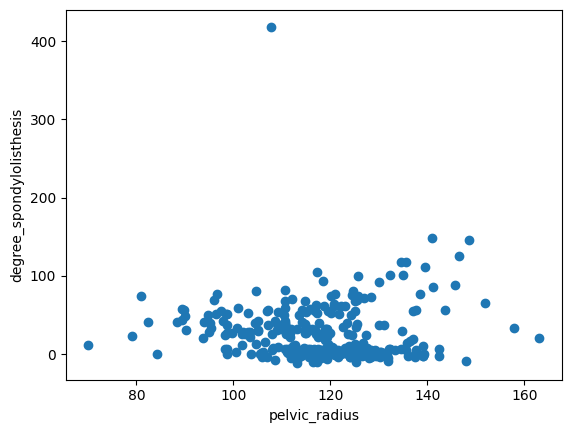

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


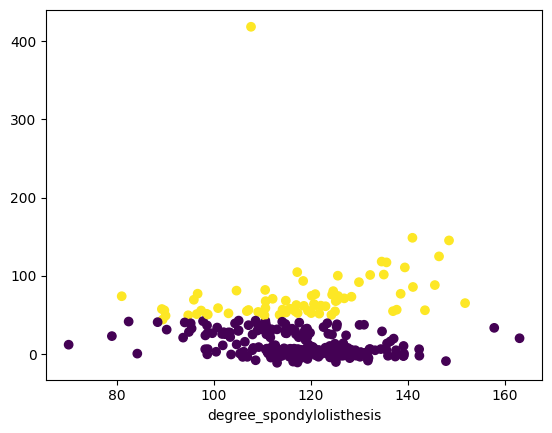

In [2]:
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [5]:
#EVALUATING OF CLUSTERING
# cross tabulation table
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


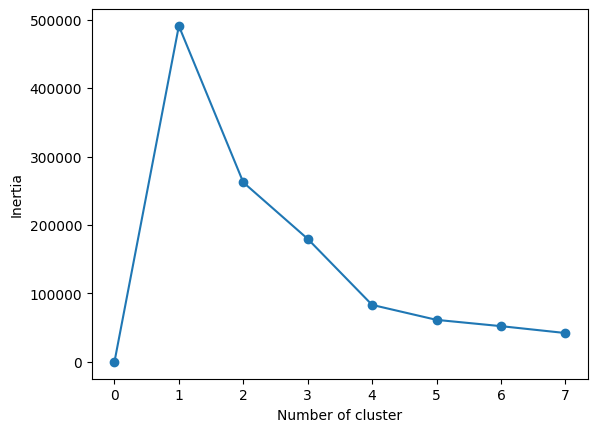

In [7]:
#inertia: how spread out the clusters are distance from each sample
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init='auto', init='k-means++')
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()